# Kathmandu Youth Fashion Forecaster — EDA & Starter Notebook

This notebook helps you explore the synthetic 1-year datasets (sales, social, Google Trends), clean and filter to the cohort (Kathmandu, male, ages ~17–25), visualize seasonality, extract hashtags, merge trends, and run a quick Prophet demo for one category.

Place this notebook in your project root `MENS_FASHION_FORECAST/notebooks/` so the `data/` folder is at the same level.

In [1]:
# 0. Setup - run once
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Python executable:", sys.executable)
print("Working dir:", os.getcwd())
print("\nFiles in data/:")
for f in sorted(os.listdir("../data") if os.path.exists("../data") else os.listdir("data")):
    print("-", f)


Python executable: c:\Users\shahi\Desktop\Final Year plan\Mens_Fashion_Forecast\venv\Scripts\python.exe
Working dir: c:\Users\shahi\Desktop\Final Year plan\Mens_Fashion_Forecast\notebooks

Files in data/:
- .gitignore
- google_trends_1yr_nepal.csv
- sales_data_1yr_nepal.csv
- social_media_1yr_nepal.csv


In [2]:
# 1. Load datasets
DATA_DIR = "../data" if os.path.exists("../data") else "data"

sales_fp = os.path.join(DATA_DIR, "sales_data_1yr_nepal.csv")
social_fp = os.path.join(DATA_DIR, "social_media_1yr_nepal.csv")
trends_fp = os.path.join(DATA_DIR, "google_trends_1yr_nepal.csv")

sales = pd.read_csv(sales_fp, parse_dates=["Date"])
social = pd.read_csv(social_fp, parse_dates=["PostDate"])
trends = pd.read_csv(trends_fp, parse_dates=["Date"])

print("sales:", sales.shape)
print("social:", social.shape)
print("trends:", trends.shape)

display(sales.head())
display(social.head())
display(trends.head())

sales: (28346, 9)
social: (31279, 9)
trends: (2190, 4)


,Date,ItemID,City,AgeGroup,Gender,Category,StylePersona,PriceTier,UnitsSold
0,2024-11-01,10000,Kathmandu,15-19,Male,Jackets,K-Fashion Enthusiast,Low,0
1,2024-11-01,10001,Kathmandu,25-30,Female,T-Shirts,Bohemian/Indie,Mid,1
2,2024-11-01,10002,Kathmandu,25-30,Female,Jackets,K-Fashion Enthusiast,Low,0
3,2024-11-01,10003,Kathmandu,25-30,Male,Crop Tops,Bohemian/Indie,Premium,3
4,2024-11-01,10004,Kathmandu,20-24,Male,T-Shirts,American Streetwear,Low,0


,PostDate,PostID,City,AgeGroup,Gender,Caption,Hashtags,StylePersona,Likes
0,2024-11-01,200000,Kathmandu,31-40,Female,Street check in Kathmandu — #indievibes #handmade,#indievibes #handmade,Bohemian/Indie,24
1,2024-11-01,200001,Pokhara,15-19,Female,Layering today: hoodie + jacket. #kpop #seoulv...,#kpop #seoulvibes,K-Fashion Enthusiast,27
2,2024-11-01,200002,Kathmandu,15-19,Male,Thrift finds this weekend. #kstyle,#kstyle,K-Fashion Enthusiast,27
3,2024-11-01,200003,Kathmandu,20-24,Male,New drop in Kathmandu! #seoulvibes #kstyle,#seoulvibes #kstyle,K-Fashion Enthusiast,29
4,2024-11-01,200004,Kathmandu,31-40,Female,Layering today: hoodie + jacket. #seoulvibes #...,#seoulvibes #kpop,K-Fashion Enthusiast,28


,Date,Region,Keyword,InterestScore
0,2024-11-01,Nepal,Hoodies,49
1,2024-11-01,Nepal,Cargo Pants,15
2,2024-11-01,Nepal,Graphic Tees,18
3,2024-11-01,Nepal,Jackets,17
4,2024-11-01,Nepal,Crop Tops,10


In [3]:
# 2. Quick checks
print("Sales columns:", sales.columns.tolist())
print("\nMissing per column (sales):")
print(sales.isnull().sum())
print("\nMissing per column (social):")
print(social.isnull().sum())
print("\nMissing per column (trends):")
print(trends.isnull().sum())

Sales columns: ['Date', 'ItemID', 'City', 'AgeGroup', 'Gender', 'Category', 'StylePersona', 'PriceTier', 'UnitsSold']

Missing per column (sales):
Date            0
ItemID          0
City            0
AgeGroup        0
Gender          0
Category        0
StylePersona    0
PriceTier       0
UnitsSold       0
dtype: int64

Missing per column (social):
PostDate        0
PostID          0
City            0
AgeGroup        0
Gender          0
Caption         0
Hashtags        0
StylePersona    0
Likes           0
dtype: int64

Missing per column (trends):
Date             0
Region           0
Keyword          0
InterestScore    0
dtype: int64


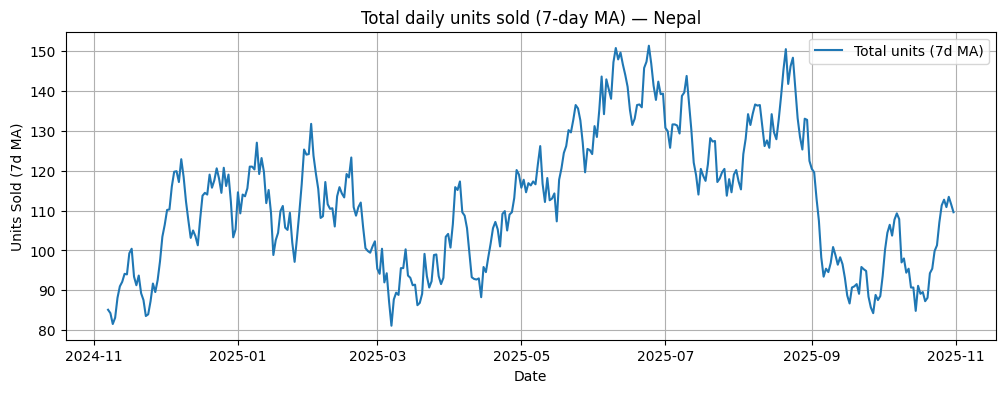

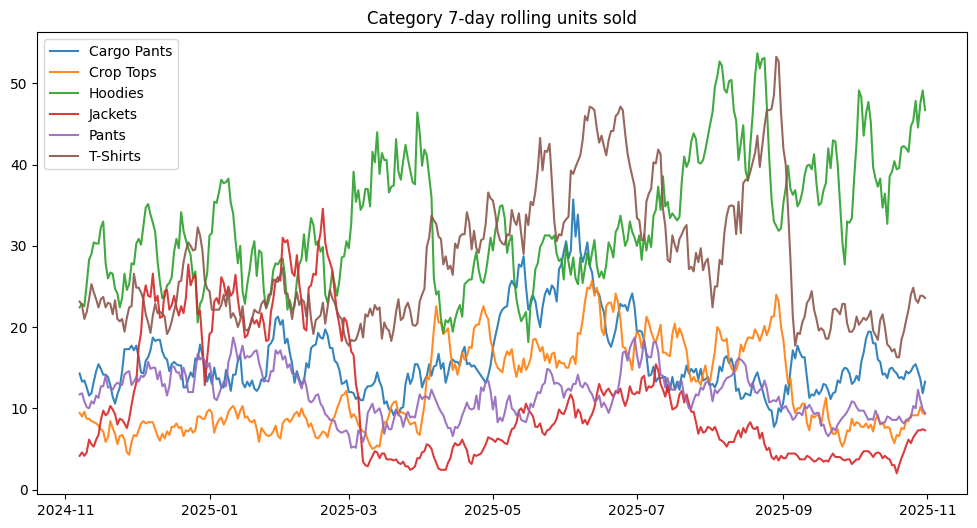

In [4]:
# 3. Aggregate overview: total daily sales and category series
daily_total = sales.groupby("Date")["UnitsSold"].sum().reset_index()
plt.figure(figsize=(12,4))
plt.plot(daily_total["Date"], daily_total["UnitsSold"].rolling(7).mean(), label="Total units (7d MA)")
plt.title("Total daily units sold (7-day MA) — Nepal")
plt.xlabel("Date"); plt.ylabel("Units Sold (7d MA)")
plt.grid(True); plt.legend()
plt.show()

# Category series (7-day rolling)
cat_ts = sales.groupby(["Date","Category"])["UnitsSold"].sum().unstack(fill_value=0)
cat_ts_7 = cat_ts.rolling(7).mean()
plt.figure(figsize=(12,6))
for c in cat_ts_7.columns:
    plt.plot(cat_ts_7.index, cat_ts_7[c], label=c, alpha=0.9)
plt.legend(); plt.title("Category 7-day rolling units sold")
plt.show()